In [16]:
import numpy as np 
import pandas as pd
import face_recognition


from UB_Face import cluster_faces , detect_faces
import cv2
import numpy as np
import os
import sys
import math
import requests



import pickle

In [17]:
with open('face_encodings.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
def read_images(img_dir):
    res = {}
    for img_name in sorted(os.listdir(img_dir)):
        img_path = os.path.join(img_dir, img_name)
        img = cv2.imread(img_path)
        res[img_name] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return res
imgs = read_images('faceCluster_5')



# Face Encoding values, but its being imported by pickle so skip

In [19]:
boxes = []
face_encodings = {}
face_encodings_ndarray = np.zeros((len(imgs), 128))
count = 0
print(face_encodings_ndarray.shape)
for key, value in imgs.items():
    for i in detect_faces(value):
        top = int(i[1])
        left = int(i[0])
        bottom = int(i[1] + i[3])
        right = int(i[0] + i[2])
        boxes.append((top, right, bottom, left))
        face_encodings[key] = face_recognition.face_encodings(value, boxes)
        face_encodings_ndarray[count] = face_encodings[key][0]
    count += 1
    

(36, 128)


# data from Pickle

In [20]:
# print(data)

features = data.T
cov_matrix = np.cov(features)

values, vectors = np.linalg.eig(cov_matrix)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))


'''
print(np.sum(explained_variances), '\n explained_variances')

print(np.asarray(explained_variances).shape)
# print(np.asarray(explained_variances).shape)

print("max = :",max(explained_variances),np.argmax(explained_variances))
print("second max = :", max(explained_variances[1:]),np.argmax(explained_variances[1:]) )

print(explained_variances)
'''


first_max = np.argmax(explained_variances)
second_max = np.argmax(explained_variances[1:])


PCAd_X = data.dot(vectors.T[first_max])

PCAd_Y = data.dot(vectors.T[second_max])

img_names = list(imgs.keys())
res = pd.DataFrame(PCAd_X, columns=['PC1'])
res['PC2'] = PCAd_Y
res['Y'] = img_names
res.head()

# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(20, 10))
# sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)


,PC1,PC2,Y
0,0.426781+0.000000j,0.426781+0.000000j,1.jpg
1,0.047074+0.000000j,0.047074+0.000000j,10.jpg
2,0.200431+0.000000j,0.200431+0.000000j,11.jpg
3,0.114439+0.000000j,0.114439+0.000000j,12.jpg
4,0.116278+0.000000j,0.116278+0.000000j,13.jpg


In [15]:
print(res)

                   PC1                 PC2       Y
0   0.426781+0.000000j  0.426781+0.000000j   1.jpg
1   0.047074+0.000000j  0.047074+0.000000j  10.jpg
2   0.200431+0.000000j  0.200431+0.000000j  11.jpg
3   0.114439+0.000000j  0.114439+0.000000j  12.jpg
4   0.116278+0.000000j  0.116278+0.000000j  13.jpg
5   0.215559+0.000000j  0.215559+0.000000j  14.jpg
6   0.561820+0.000000j  0.561820+0.000000j  15.jpg
7   0.612533+0.000000j  0.612533+0.000000j  16.jpg
8   0.128579+0.000000j  0.128579+0.000000j  17.jpg
9   0.566376+0.000000j  0.566376+0.000000j  18.jpg
10  0.585733+0.000000j  0.585733+0.000000j  19.jpg
11  0.345513+0.000000j  0.345513+0.000000j   2.jpg
12  0.598239+0.000000j  0.598239+0.000000j  20.jpg
13  0.162283+0.000000j  0.162283+0.000000j  21.jpg
14  0.055337+0.000000j  0.055337+0.000000j  22.jpg
15  0.623150+0.000000j  0.623150+0.000000j  23.jpg
16  0.667674+0.000000j  0.667674+0.000000j  24.jpg
17  0.070863+0.000000j  0.070863+0.000000j  25.jpg
18  0.698124+0.000000j  0.69812

# Kmeans implementation

In [ ]:

# # Your functions. (if needed)


class KMeans(object):

    def __init__(self):  # No need to implement
        pass

    def pairwise_dist(self, img_encoding_vector, centroid_vector):  # [5 pts]
        # print("++++++++++++In pairwise_dist++++++++++++")
        # print("X >")
        # print(x.shape)
        # print("++++++++++++++++++++++++++++++++++++++++")
        # print("Y >")
        # print(y.shape)
        """
        Args:
            img_encoding_vector: N x D numpy array here 36x128
            y: M x D numpy array >  5x128
        Return:
                dist: N x M array, where dist[i, j] is the euclidean distance between
                x[i][:] and y[j][:]
                """
        img_encoding_vector_SumSquare = np.sum(np.square(img_encoding_vector), axis=1)
        centroid_vector_SumSquare = np.sum(np.square(centroid_vector), axis=1)
        # #print(xSumSquare, ySumSquare)
        mul = np.dot(img_encoding_vector, centroid_vector.T)

        dists = np.sqrt(abs(img_encoding_vector_SumSquare[:, np.newaxis] + centroid_vector_SumSquare - 2 * mul))
        # print("++++++++++++++++++++++++++++++++++++++++")

        # print("distances ")

        # print(dists)

        
        '''
        return [np.linalg.norm(centroid - encoding) for centroid in centroids]
        '''


        # print("++++++++++++ END pairwise_dist++++++++++++")
        return dists

    def _init_centers(self, points, K, **kwargs):  # [5 pts]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers.
        """
        
        '''print("++++++++++++In _init_centers ++++++++++++")
        row, col = points.shape
        #print("row >",row, " cols >", col)
        retArr = np.empty([K, col])
        #print(" retArr shape > ", retArr.shape)
        for number in range(K):
            randIndex = np.random.randint(row)
            retArr[number] = points[randIndex]

        '''
        
        ##################### K-Means+++ ###################


        '''
        initialized the centroids for K-means++
        inputs:
            data - numpy array of data points having shape (200, 2)
            k - number of clusters
        '''
        ## initialize the centroids list and add
        ## a randomly selected data point to the list
        row, col = points.shape


        centroids = list(np.empty([K, col]) )
        centroids.append(points[np.random.randint( points.shape[0]), :])
        
        ## compute remaining k - 1 centroids
        for _ in range(K - 1):

            ## initialize a list to store distances of data
            ## points from nearest centroid
            dist = []
            for i in range(points.shape[0]):
                point = points[i, :]
                d = sys.maxsize

                ## compute distance of 'point' from each of the previously
                ## selected centroid and store the minimum distance
                for j in range(len(centroids)):
                    temp_dist = self.pairwise_dist(point, [centroids[j]] )
                    d = min(d, temp_dist)
                dist.append(d)

            ## select data point with maximum distance as our next centroid
            dist = np.array(dist)
            next_centroid = points[np.argmax(dist), :]
            centroids.append(next_centroid)
            
        print("++++++++++++END _init_centers ++++++++++++")
        return centroids

    def _update_assignment(self, centers, points):  # [10 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point

        Hint: You could call pairwise_dist() function.
        """
        
        print("++++++++++++In _update_assignment ++++++++++++")
        row, col = points.shape
        cluster_idx = np.empty([row])
        distances = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distances, axis=1)

        
        print("++++++++++++END  _update_assignment ++++++++++++")

        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points):  # [10 pts]
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        
        print("++++++++++++In  _update_centers ++++++++++++")

        K, D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i], axis=0)

            #print("Centroid ",i, " > ",new_centers[i])
        
        print("++++++++++++ END  _update_centers ++++++++++++")
        return new_centers

    def _get_loss(self, centers, cluster_idx, points):  # [5 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans.
        """
        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        N, D = points.shape
        for i in range(N):
            loss = loss + np.square(dists[i][cluster_idx[i]])

        return loss

    def __call__(self, points, K, max_iters=20, abs_tol=1e-10, rel_tol=1e-10, verbose=True, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        print("++++++++++++In __Call__++++++++++++")
        

            
        

        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            print('Iter count: ', it)
            cluster_idx = self._update_assignment(centers, points)
            if verbose:
                print("clusterr assignment for iter ",it)
                print(cluster_idx)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol: #break out if model plateaus
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        
        return cluster_idx, centers, loss

# runner

In [ ]:
k_means = KMeans()
cluster_idx, centers, loss = k_means(face_encodings_ndarray, K)
#print(cluster_idx, centers, loss)
img_names = list(imgs.keys())
cluster_list = [[] for _ in range(K)]
counter = 0
for index in cluster_idx:
    cluster_list[int(index)].append(img_names[counter])
    counter += 1
print(cluster_list)
cluster_results = cluster_list

#
#
#
#
# End 

# __

In [7]:
centroids

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [16]:
row, col = points.shape
K=5
#print("row >",row, " cols >", col)
retArr = np.empty([K, col])
#print(" retArr shape > ", retArr.shape)
for number in range(K):
    randIndex = np.random.randint(row)
    retArr[number] = points[randIndex]

print(retArr)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
centroids.append(points[np.random.randint( points.shape[0]), :])

centroids

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
features = points.T
cov_matrix = np.cov(features)

values, vectors = np.linalg.eig(cov_matrix)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

In [ ]:

def cluster_faces(imgs: Dict[str, np.ndarray], K: int) -> List[List[str]]:
    cluster = {}
    centroids = []
    encodings = []
    face_names = []

    for imgname, pixels in imgs.items():
        encoding = face_recognition.face_encodings(pixels)
        encodings.append(np.asarray(encoding))
        face_names.append(imgname)

    centroid_indices = np.random.choice(range(len(encodings)),K)
    centroids = [encodings[i] for i in centroid_indices]
    print(centroid_indices)

    # for imgname in imgs:
    #     dist = []
    #     for j in range (K):
    #         dist.append(np.linalg.norm(encoding - centroids[j]))
    #     cluster[dist.index(min(dist))].append(encoding)

    # min, max = np.min(centroids, axis=0), np.max(centroids, axis=0)

    for i in range (100):
        cluster,cluster_faces = recalculate_clusters(encodings, face_names, centroids, K)
        centroids =  recalculate_centroids(centroids, cluster, K)

    # for i in range (len(imgname)):
    #     face_dict[imgname] = imgs.get("imagename")
    #     face_dict[encodings] = encodings[i]
    cluster_results = [value for key,value in cluster_faces.items()]

        
    return cluster_results


'''
If your implementation requires multiple functions. Please implement all the functions you design under here.
But remember the above 2 functions are the only functions that will be called by tasK1.py and tasK2.py.
'''

# Your functions. (if needed)
def distance(encoding, centroids):
    return [np.linalg.norm(centroid - encoding) for centroid in centroids]

def recalculate_clusters(imgs, face_names,centroids, K):
    clusters = {}
    cluster_faces = {}
    for i in range(K):
        clusters[i] = []
        cluster_faces[i] = []
    for name,encoding in zip(face_names,imgs):
        dist = []
        dist = distance(encoding, centroids)
        clusters[dist.index(min(dist))].append(encoding)
        cluster_faces[dist.index(min(dist))].append(name)
    return clusters,cluster_faces

def recalculate_centroids(centroids, clusters, K):
    centroids = []
    for i in range(K):
        centroids.append(np.average(clusters[i], axis=0))
    return centroids

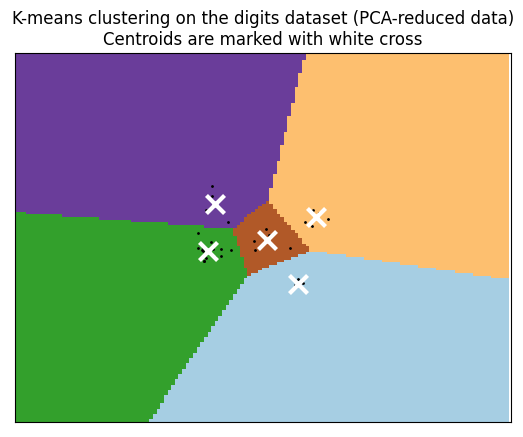

In [3]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters= 5, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
